In [1]:
import pandas as pd
import numpy as np
import os
import warnings


# Machine Learning
Es una disciplina de la inteligencia artificial

## Carga de datos

In [88]:
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

<AxesSubplot:>

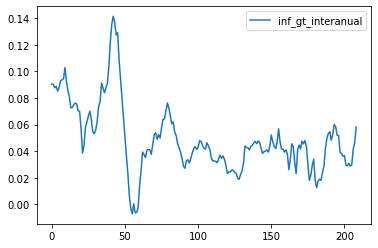

In [81]:


df = pd.read_csv("Data/datainflacion.csv")

#inf1 = df["inf_gt_interanual"]
#inflacionIntermensual = df.drop(columns = ['Value','anualizada'])
#inflacionAnualizada = df.drop(columns = ['Value','intermensual'])

inflacionInteranual = df[["Periodo","inf_gt_interanual"]]

inflacionInteranual.plot()

#inf1['Período'] = inf1['Período'].astype(datetime64)





#fig = plt.figure(figsize=(8,6))
#inflacionInteranual['inf_gt_interanual'] = inflacionInteranual['inf_gt_interanual'].astype(str)
#autocorrelation_plot(inflacionInteranual)
#plt.show()
#print(inf1.head(5))



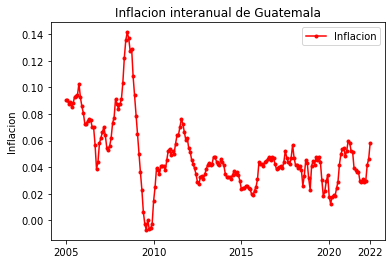

In [95]:
plt.plot(inflacionInteranual.Periodo,inflacionInteranual.inf_gt_interanual, 'r.-', label = 'Inflacion')
plt.title('Inflacion interanual de Guatemala')
plt.ylabel('Inflacion')
plt.legend()
plt.xticks([0,60,120,180,208],['2005','2010','2015','2020','2022'])


#inflacionInteranual.Periodo[::3].tolist()+[2021]
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

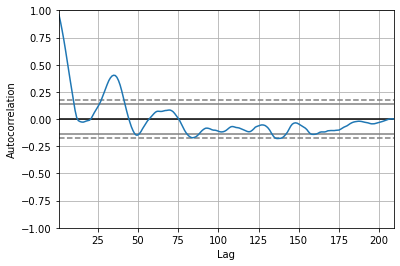

In [98]:
pd.plotting.autocorrelation_plot(inflacionInteranual.inf_gt_interanual)

Para la Autocorrelacion y la Autocorrelacion parcial

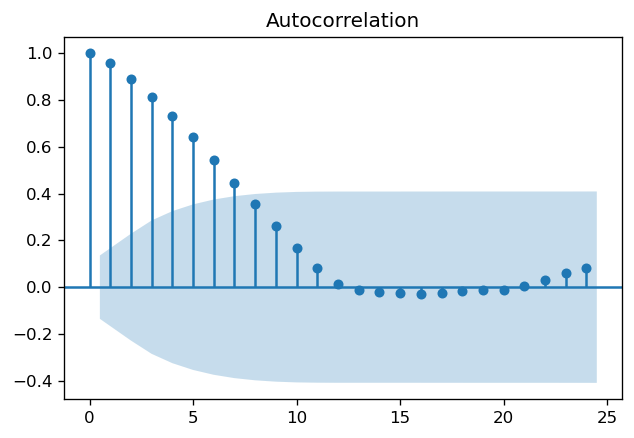

In [105]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plot_acf(inflacionInteranual.inf_gt_interanual)
plt.show()

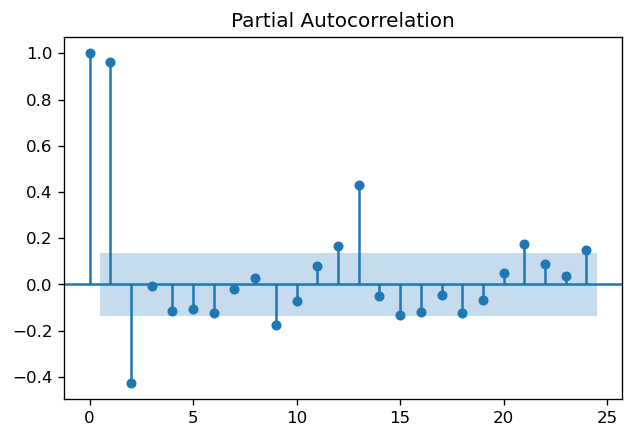

In [108]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(inflacionInteranual.inf_gt_interanual)
plt.show()

Dickey-Fuller test

In [115]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(); print(f'ADF Statistic: {result[0]}')
    print();  print(f'n_lags: {result[1]}')
    print();  print(f'p-value: {result[1]}')

    print(); print('Critial Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')   

adf_test(inflacionInteranual.inf_gt_interanual)


ADF Statistic: -2.2669010748116656

n_lags: 0.18286528840373362

p-value: 0.18286528840373362

Critial Values:
   1%, -3.464337030867007
   5%, -2.876478799035722
   10%, -2.574733103221565


Prueba KPSS

In [116]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    
    # Format Output
    print(); print(f'KPSS Statistic: {statistic}')
    print(); print(f'p-value: {p_value}')
    print(); print(f'num lags: {n_lags}')
    print(); print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    
kpss_test(inflacionInteranual.inf_gt_interanual)


KPSS Statistic: 0.6470763699083445

p-value: 0.018356693644695953

num lags: 15

Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


### Para encontrar el orden de diferenciacion optimo en un modelo ARIMA

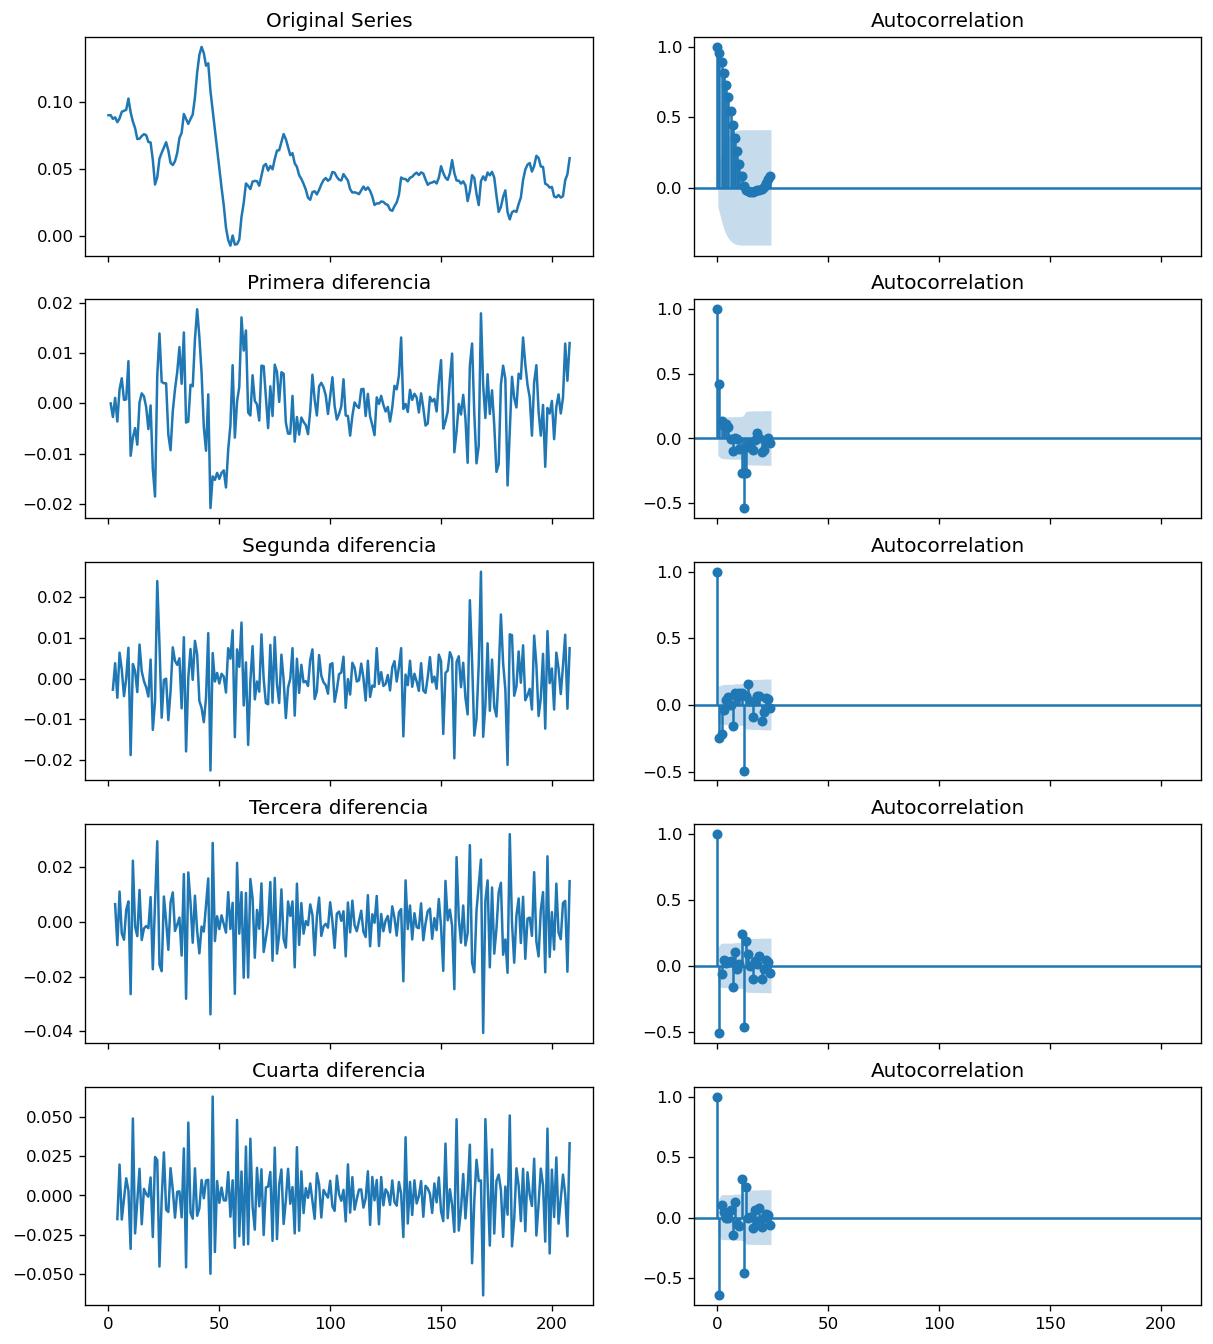

In [140]:
plt.rcParams.update({'figure.figsize':(12,14), 'figure.dpi':120})

# Import data
#df = pd.read_csv('shampoo.csv', header=0, names = ['Sales'])
#df.reset_index(drop=True, inplace=True)

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(inflacionInteranual.inf_gt_interanual); axes[0, 0].set_title('Original Series')
plot_acf(inflacionInteranual.inf_gt_interanual, ax=axes[0, 1].set())

# 1st Differencing
df1 = inflacionInteranual.inf_gt_interanual.diff()
axes[1, 0].plot(df1); axes[1, 0].set_title('Primera diferencia')
plot_acf(df1.dropna(), ax=axes[1, 1])

# 2nd Differencing
df2 = inflacionInteranual.inf_gt_interanual.diff().diff()
axes[2, 0].plot(df2); axes[2, 0].set_title('Segunda diferencia')
plot_acf(df2.dropna(), ax=axes[2, 1])

# 3rd Differencing
df3 = inflacionInteranual.inf_gt_interanual.diff().diff().diff()
axes[3, 0].plot(df3); axes[3, 0].set_title('Tercera diferencia')
plot_acf(df3.dropna(), ax=axes[3, 1])

# 3rd Differencing
df4 = inflacionInteranual.inf_gt_interanual.diff().diff().diff().diff()
axes[4, 0].plot(df4); axes[4, 0].set_title('Cuarta diferencia')
plot_acf(df4.dropna(), ax=axes[4, 1])

plt.show()

Estadistica de ADF y KPSS 

In [123]:
warnings.filterwarnings("ignore")

print("---------------------------------------------")
print("Primera diferencia: ")
print("---------------------------------------------")
df1 = inflacionInteranual.inf_gt_interanual.diff()
print(); print("---------------------------------------------")
adf_test(df1.dropna())
print(); print("---------------------------------------------")
kpss_test(df1.dropna())
print(); print("---------------------------------------------")


print(); print("---------------------------------------------")
print("Segunda diferencia: ")
print("---------------------------------------------")
df2 = inflacionInteranual.inf_gt_interanual.diff().diff()
print(); print("---------------------------------------------")
adf_test(df2.dropna())
print(); print("---------------------------------------------")
kpss_test(df2.dropna())
print(); print("---------------------------------------------")

print(); print("---------------------------------------------")
print("Tercera diferencia: ")
print("---------------------------------------------")
df3 = inflacionInteranual.inf_gt_interanual.diff().diff().diff()
print(); print("---------------------------------------------")
adf_test(df3.dropna())
print(); print("---------------------------------------------")
kpss_test(df3.dropna())
print(); print("---------------------------------------------")

print(); print("---------------------------------------------")
print("Cuarta diferencia: ")
print("---------------------------------------------")
df4 = inflacionInteranual.inf_gt_interanual.diff().diff().diff().diff()
print(); print("---------------------------------------------")
adf_test(df4.dropna())
print(); print("---------------------------------------------")
kpss_test(df4.dropna())
print(); print("---------------------------------------------")

---------------------------------------------
Primera diferencia: 
---------------------------------------------

---------------------------------------------

ADF Statistic: -5.988235741371002

n_lags: 1.7709835824927618e-07

p-value: 1.7709835824927618e-07

Critial Values:
   1%, -3.464337030867007
   5%, -2.876478799035722
   10%, -2.574733103221565

---------------------------------------------

KPSS Statistic: 0.06847889971786895

p-value: 0.1

num lags: 15

Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

---------------------------------------------

---------------------------------------------
Segunda diferencia: 
---------------------------------------------

---------------------------------------------

ADF Statistic: -6.984837829310654

n_lags: 8.018234871104528e-10

p-value: 8.018234871104528e-10

Critial Values:
   1%, -3.465058702600837
   5%, -2.8767942675230356
   10%, -2.5749014492475535

---------------------------------------------

KPSS

Para encontrar el orden del termino autoregresivo

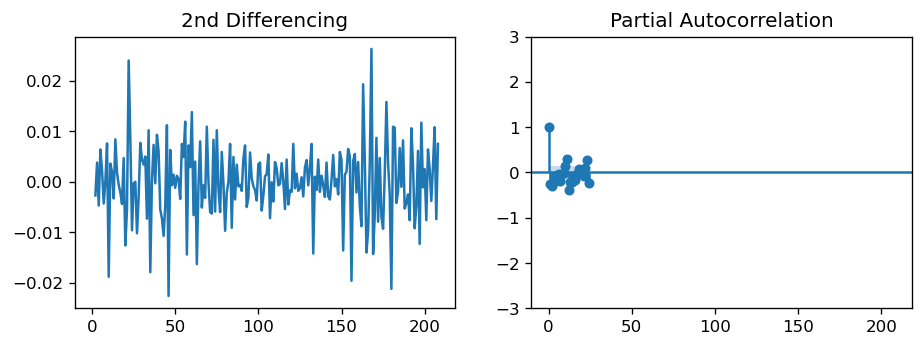

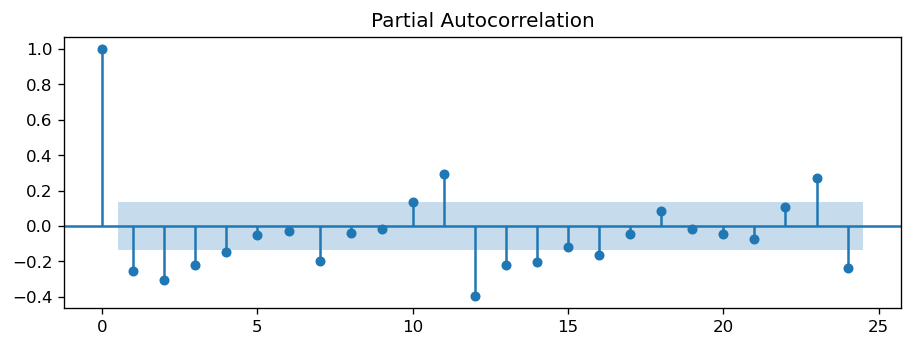

In [156]:
# PACF plot 
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

df2 = inflacionInteranual.inf_gt_interanual.diff().diff() #.diff() #.diff()

axes[0].plot(df2); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(-3,3)) #, xlim=(-1,25)
plot_pacf(df2.dropna(), ax=axes[1]) #PACF

plt.show()
plot_pacf(df2.dropna()) #PACF

plt.show()

Para encontrar el orden del termino MA

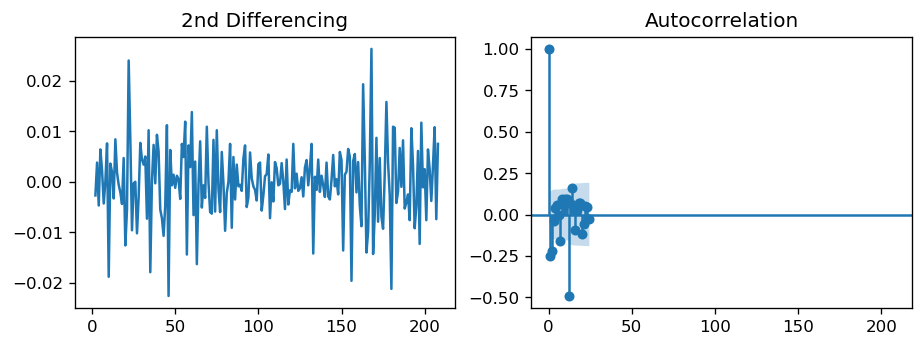

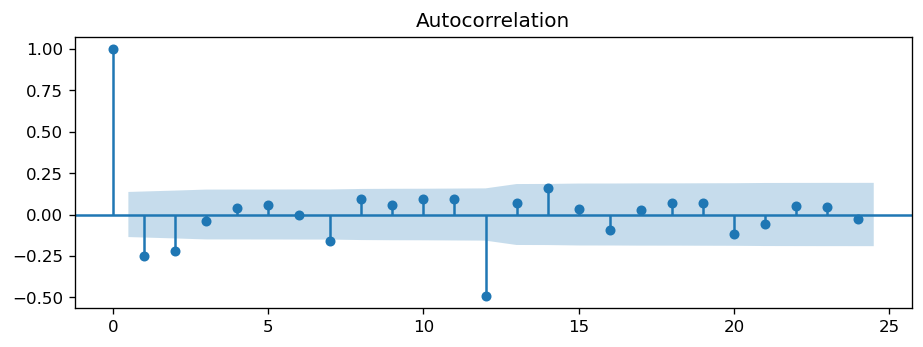

In [155]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

#df2 = df["Inflation_ConsumerPrice_Annual_Percentage"].diff().diff() #.diff() #.diff()
axes[0].plot(df2); axes[0].set_title('2nd Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(df2.dropna(), ax=axes[1]) # ACF

plt.show()

plot_acf(df2.dropna()) # ACF
plt.show()

ADF test en la segunda diferencia

In [157]:
adf_test(df2.dropna())



ADF Statistic: -6.984837829310654

n_lags: 8.018234871104528e-10

p-value: 8.018234871104528e-10

Critial Values:
   1%, -3.465058702600837
   5%, -2.8767942675230356
   10%, -2.5749014492475535


## Construyendo el modelo ARIMA

In [158]:
from statsmodels.tsa.arima_model import ARIMA

                              ARIMA Model Results                               
Dep. Variable:     D2.inf_gt_interanual   No. Observations:                  207
Model:                   ARIMA(2, 2, 0)   Log Likelihood                 740.557
Method:                         css-mle   S.D. of innovations              0.007
Date:                  Wed, 10 Aug 2022   AIC                          -1473.114
Time:                          18:30:25   BIC                          -1459.783
Sample:                               2   HQIC                         -1467.723
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       5.256e-05      0.000      0.181      0.856      -0.001       0.001
ar.L1.D2.inf_gt_interanual    -0.3239      0.066     -4.885      0.

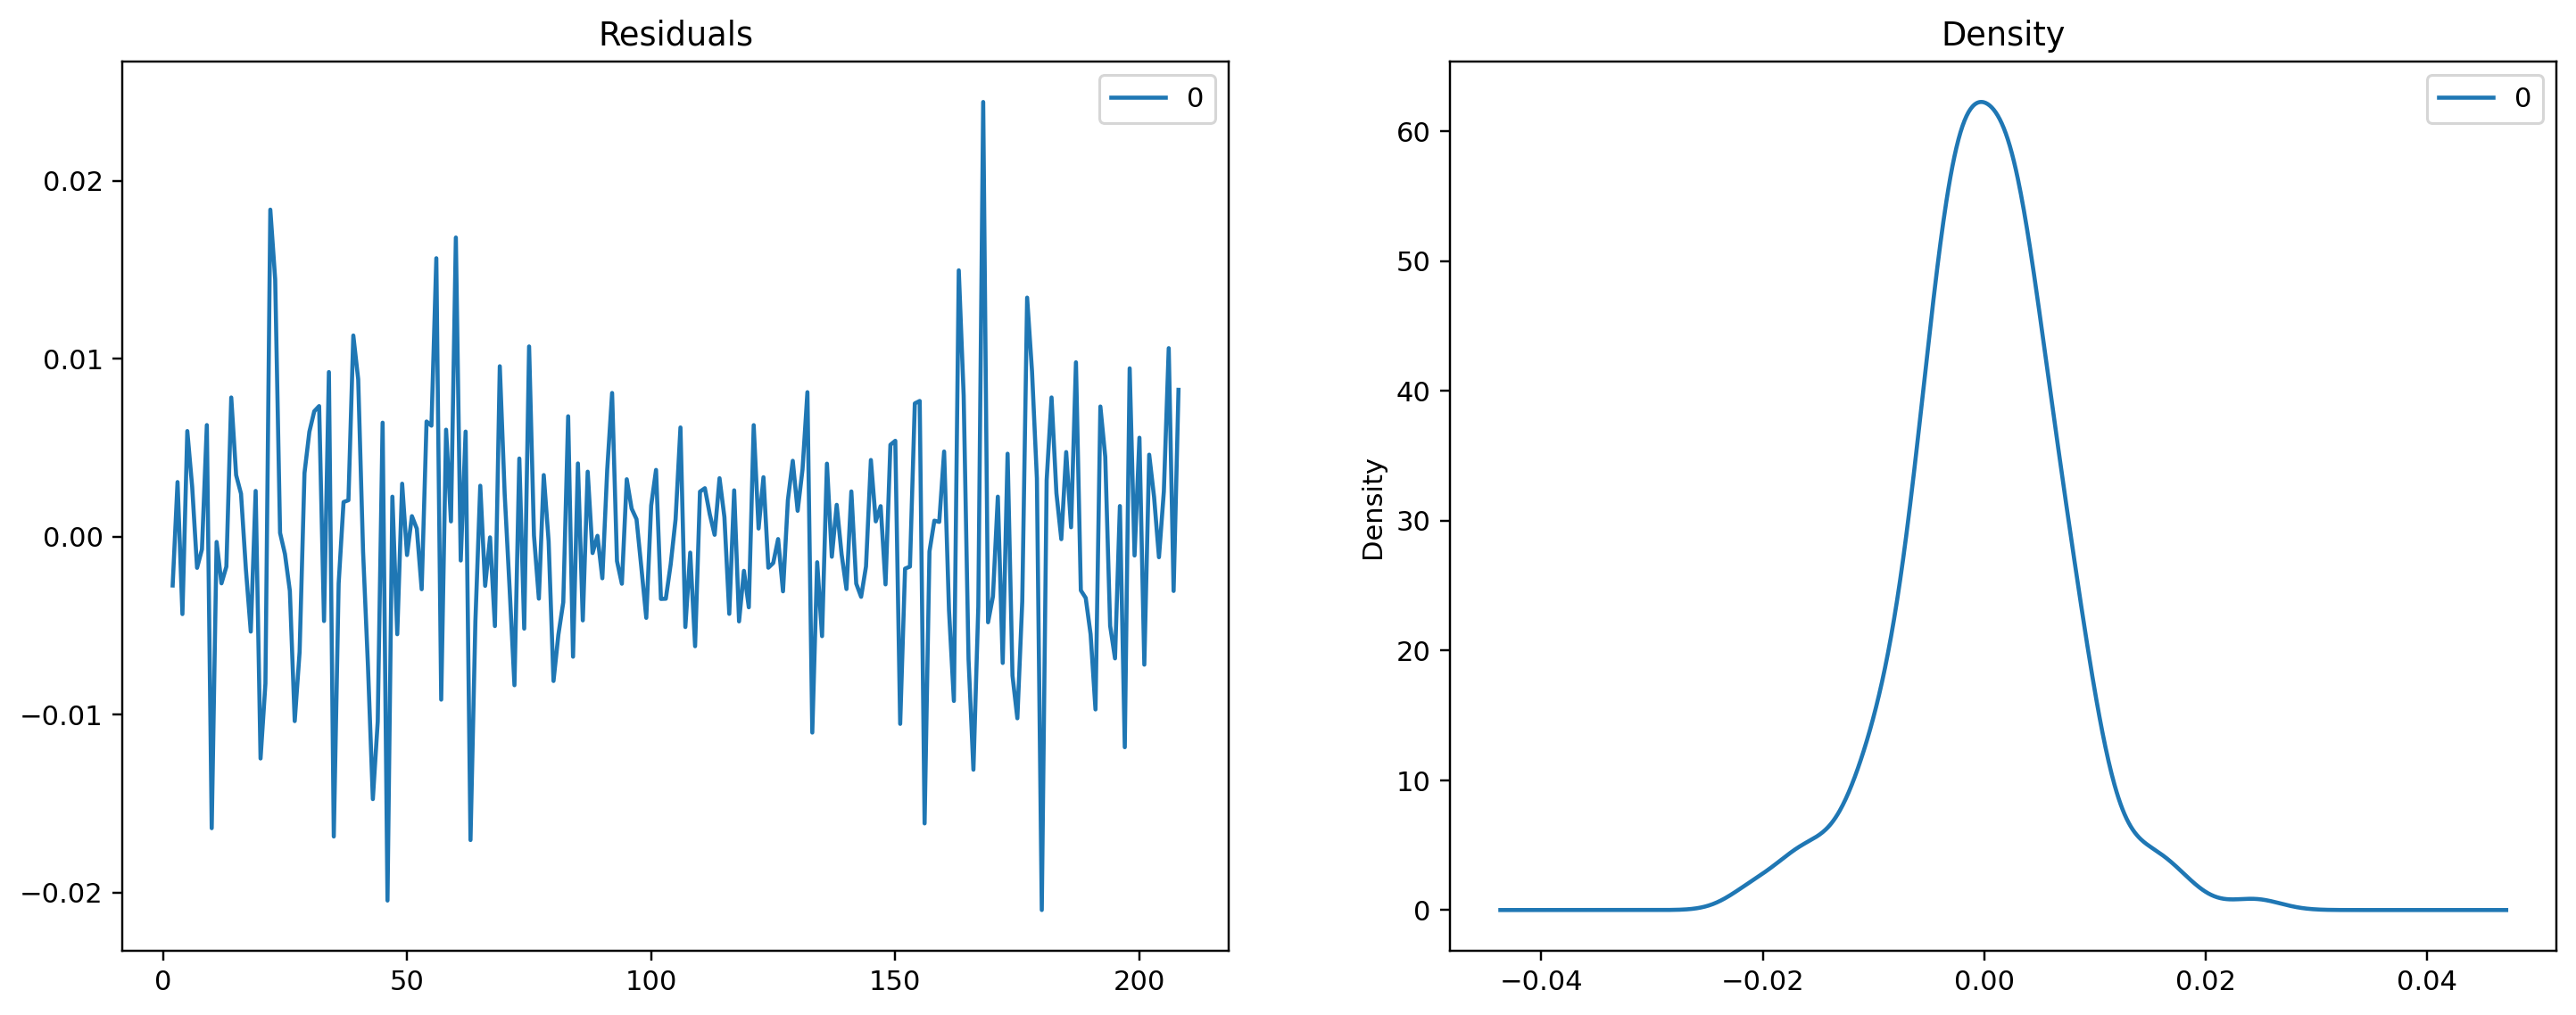

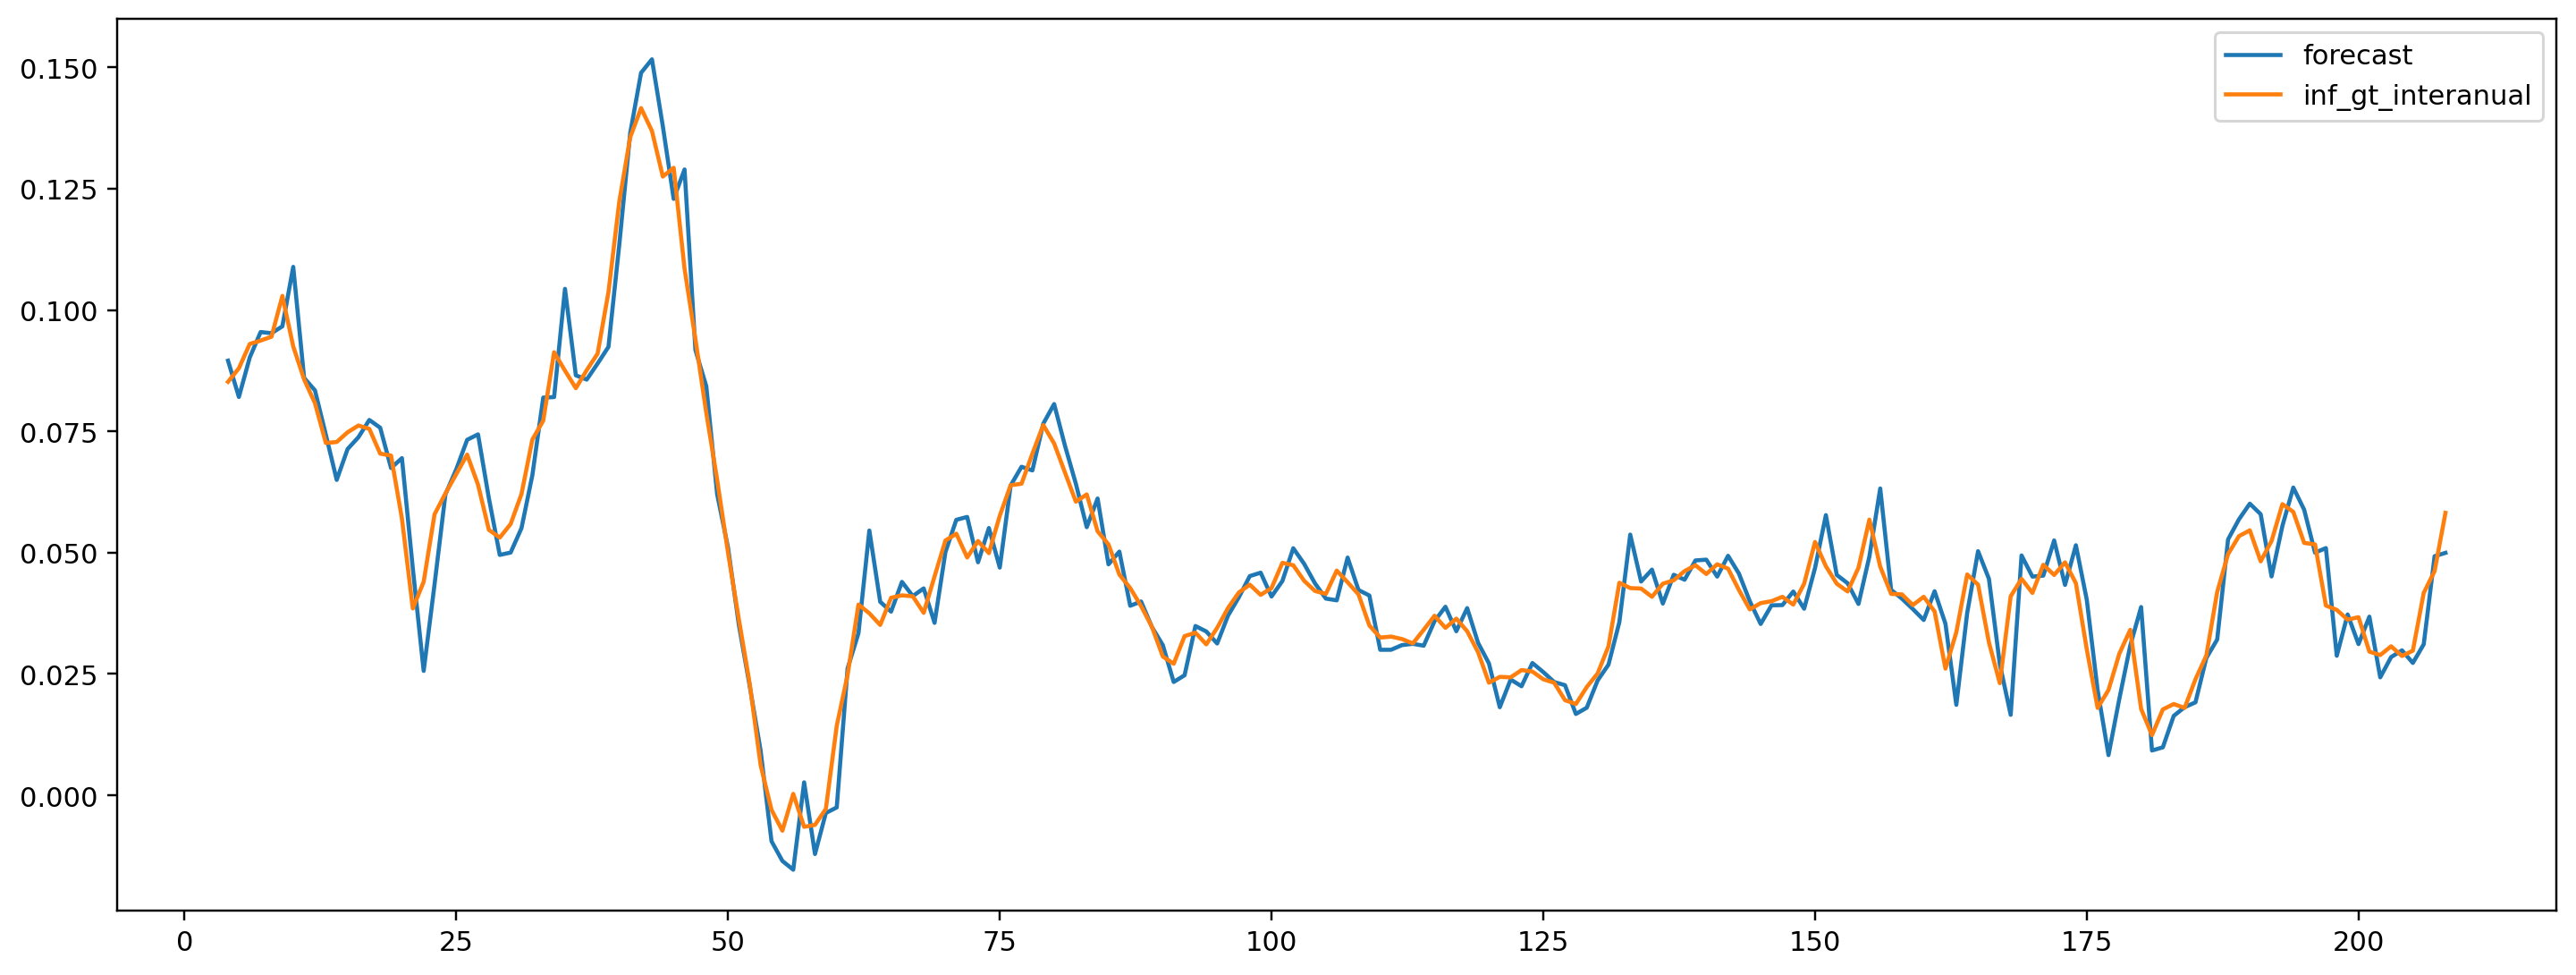

In [163]:
plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':220})

#df = read_csv(filename)
#df = df.set_index('Year')

# ARIMA Model
model = ARIMA(inflacionInteranual.inf_gt_interanual, order=(2,2,0)) #cambiar a 2,0,0
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## Utilizando Auto ARIMA

In [160]:
import pmdarima as pm

In [164]:
model_with_auto_d = pm.auto_arima(inflacionInteranual.inf_gt_interanual, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p, q
                      m=1,              # frequency of series
                      
                      d=None,           # let model determine 'd'
                      
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_with_auto_d.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-613.272, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1481.844, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1522.716, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1521.074, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1521.193, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1519.170, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1519.395, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1530.379, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1485.461, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1528.391, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1528.414, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1524.688, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1526.228, Time=0.14 sec

Best model:  ARIMA(2,0,0)

## Describe nos da la informacion general de cada una de las categorias de la data
el formato es numerico estadistico de la informacion de cada columna

In [74]:
inflacionInteranual.describe()

,inf_gt_interanual
count,257.000000
mean,0.053212
std,0.025989
min,-0.007300
25%,0.037000
50%,0.047400
75%,0.066500
max,0.141600


In [5]:
music_data = df

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
model = DecisionTreeClassifier()

In [7]:
X = music_data.drop(columns = ['genre'])
y = music_data['genre']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Accuracy verification

In [8]:
model.fit(x_train,y_train)
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions) 
score

0.5

Aca se guarda el analysis de los datos para no tener que cargarlos siempre


In [9]:
joblib.dump(model, 'music-recomender.joblib')

['music-recomender.joblib']

Aca se cargan los datos guardados analizados previamente

In [10]:
model = joblib.load('music-recomender.joblib')
predictions = model.predict([[21,1]])
predictions


array(['HipHop'], dtype=object)

# Decision Tree

In [11]:
from sklearn import tree

a = tree.export_graphviz(model, out_file='music-recomender.dot', 
feature_names=['age', 'gender'], 
class_names=sorted(y.unique()),
label='all',
rounded = True,
filled= True)

ModuleNotFoundError: No module named 'graphviz'